In [1]:
from io import BytesIO
from PIL import Image
import os

In [2]:
import torch
from torchvision import models
from torch.utils.data import Dataset, SubsetRandomSampler
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# device = torch.device("cuda:0") # Let's make sure GPU is available!

c:\Users\vladv\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\vladv\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [3]:
class MotorDataset(Dataset):
    def __init__(self, folder, transform=None):
        self.transform = transform
        self.root_dir = folder
        self.data = os.listdir(folder)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_id = self.data[index]
        img = Image.open(os.path.join(self.root_dir, img_id))
        y = img_id.split('.')[0].split('_')[0]

        if self.transform:
            img = self.transform(img)
            
        return img, y, img_id

In [4]:
def viz_samples(dataset, indicies):
    cnt = len(indicies)
    plt.figure(figsize=(3*cnt, 10))
    for i, ind in enumerate(indicies):
        img, y, img_id = dataset[ind]
        plt.subplot(1, cnt, i+1)
        plt.imshow(img)
        plt.title(y)
        plt.grid(False)
        plt.axis('off')
    plt.show()

In [5]:
data = MotorDataset(folder='C:\\py\\motor_state_id\\data\\interim\\data_named')

In [6]:
data[0]

(<PIL.BmpImagePlugin.BmpImageFile image mode=RGB size=320x240 at 0x1CBC8A3FF40>,
 'A&B50',
 'A&B50_291.bmp')

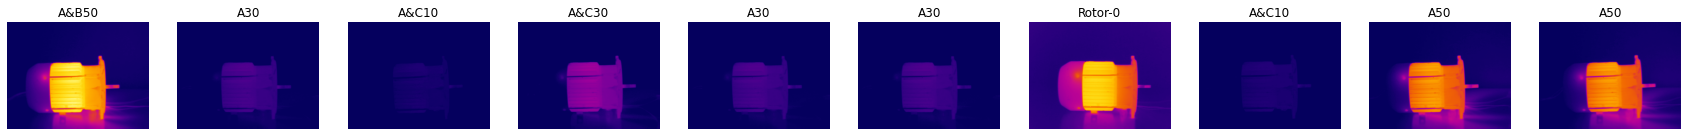

In [7]:
samples = np.random.choice(np.arange(len(data)), 10)
viz_samples(data, samples)